# 生存分析 Survival Analysis

## 什么是生存分析?
生存分析是统计的一个分支，用于分析一个事件发生之前的预期持续时间，例如生物有机体的死亡和机械设备的故障。

比如：

- 预计客户的流失随时间的变化
- 预测设备运行期间发生故障的概率
- 预测电池是否没电
- 预测用户何时愿意付费

生存分析的核心词是“***time-to-event***”，也就是分析发生event的time。

- 所谓的event：就是研究对象状态的变化，比如设备故障，感染病毒（新冠），用户退订或者用户付费，员工辞职等。用数学表述就是他们可以用0或1 来表征，而且只有0和1，没有中间的灰色地带。

- time: 更准确的表述应该是“duration time”，表示的是event发生或者观察/试验结束时时长。


## 生存分析解决什么问题

比如：
- 横向:分析对象发生事件的比例，比如多少人感染新冠，多少设备可能发生故障
- 纵向：分析对象发生事件的时间，比如何时感染，何时发生故障
- 外界因素： 分析哪些因素会加速事件的发生，比如新冠的高风险因素，设备的工况，员工的升职加薪对离职的影响


## 生存分析的数据收集

### 生存分析核心数据
- Duration： 持续时间，截止到观测时间点的每个研究对象距离事件发生的持续时间，比如员工在职时间，设备无故障持续运行时间
- Observed Event：观测的事件是否已经发生

当然了，这是一个样本（研究对象）的数据，为了研究统计信息，我们需要很多这样的样本信息。

### 生存分析协变量数据
- 任何变量： 大家对新冠已经耳熟能详了，新冠感染的高风险比如：近距离接触，职业因素，所处国家等等，都会影响感染的机率。
这些就是协变量。

## 数据删失问题censorship

数据删失就是数据不完整，比如设备你观察了10天，结果有些设备直到你结束记录都没有发生故障，也就是说它的持续时间大于你的观察时间，但是不知道大多少。 这种就是右删失。

相比而言，有一种叫做左删失，就是持续时间小于你的观察时间，比如设备发送故障了，但是忘了是哪个时间发生的。或者感染新冠了，忘了哪一天了，只记得感染过。

所以最理想的情况，就是你清楚的知道所有观测对象的准确持续时间，这个常见的试验就是加速寿命试验。

## 开始实战
我们采用之前分享的航天发动机失效数据集。


In [1]:
import pandas as pd
# read training data 
train_df = pd.read_csv('../data/PM_train.txt', sep=" ", header=None)
train_df.drop(train_df.columns[[26, 27]], axis=1, inplace=True)
train_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']
train_df

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


## 构造数据

做生存分析，核心数据就是持续时间和事件是否发生。 

在这个数据集中，最后所有的发动机都失效了。我们可以给每个样本都添加一个标签。

如果当前循环的次数大于最大次数，那就是失效了。


In [2]:
# Data Labeling - generate column RUL
rul = pd.DataFrame(train_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
train_df = train_df.merge(rul, on=['id'], how='left')
train_df['observed'] = (train_df['cycle'] >= train_df['max'])
train_df

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,max,observed
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,False
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,False
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,False
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,False
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200,False
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200,False
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200,False
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200,False


In [3]:
max_event = train_df.groupby('id').last()
max_event

,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,...,s14,s15,s16,s17,s18,s19,s20,s21,max,observed
id,,,,,,,,,,,,,,,,,,,,,
1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,21.61,...,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649,192,True
2,287,-0.0005,0.0006,100.0,518.67,643.85,1608.50,1430.84,14.62,21.61,...,8175.57,8.5365,0.03,398,2388,100.0,38.43,23.0848,287,True
3,179,0.0012,0.0000,100.0,518.67,643.51,1604.80,1428.23,14.62,21.61,...,8255.34,8.5056,0.03,398,2388,100.0,38.40,22.9562,179,True
4,189,-0.0024,-0.0002,100.0,518.67,644.53,1612.11,1432.55,14.62,21.61,...,8259.42,8.5246,0.03,398,2388,100.0,38.44,23.1006,189,True
5,269,0.0022,0.0003,100.0,518.67,643.46,1597.28,1430.74,14.62,21.61,...,8212.75,8.5209,0.03,397,2388,100.0,38.45,23.0296,269,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,336,-0.0031,-0.0005,100.0,518.67,643.74,1599.20,1432.12,14.62,21.61,...,8144.03,8.5022,0.03,397,2388,100.0,38.36,23.0258,336,True
97,202,0.0014,0.0001,100.0,518.67,643.79,1610.66,1427.41,14.62,21.61,...,8263.63,8.5277,0.03,397,2388,100.0,38.29,23.1184,202,True
98,156,0.0077,-0.0003,100.0,518.67,643.02,1603.77,1432.16,14.62,21.61,...,8122.22,8.5308,0.03,396,2388,100.0,38.33,23.1137,156,True


## 创建模型

我们先创建最简单的模型来预测。

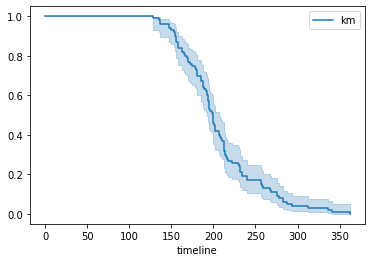

In [4]:
import lifelines
from matplotlib import pyplot as plt

max_event = train_df.groupby('id').last()

kmf = lifelines.KaplanMeierFitter(label='km')
kmf.fit(durations=max_event['cycle'],
event_observed=max_event['observed'])
kmf.plot_survival_function()
plt.show()

## Kaplan-Meier 模型
lifelines是一个完整的生存分析库，用纯 Python编写。里面包含了最全的生存分析的统计模型。这里我们调用的第一个模型是Kaplan-Meier 模型。
它是一个无参数模型，不会考虑数据的分布情况。 

它的生存函数是当前时刻和之前所有时刻的生存概率的乘积。
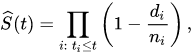

我们也注意到了，这个函数仅仅使用了持续时间作为输入参数，也就是说，它不会考虑个体和个体之间的其他差异。
对于我们这个数据集来说，运行工况就无法被有效利用。



## 模拟删失 1
我们模拟右删失情况，这种情况很常见，因为有些观测对象持续时间比观察者（人）的寿命还长。

第一种情况，假设这些机器都是同时运行的，我们在某个时间停止观察，比如在250次的时候。

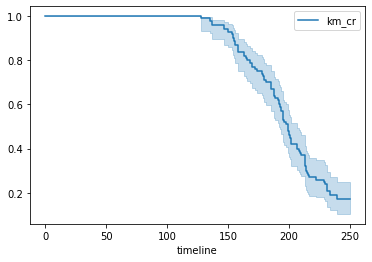

In [5]:
import lifelines
from matplotlib import pyplot as plt

max_event_censor_right = train_df[train_df['cycle']<=250].groupby('id').last()

kmf_cr = lifelines.KaplanMeierFitter(label='km_cr')
kmf_cr.fit(durations=max_event_censor_right['cycle'],
event_observed=max_event_censor_right['observed'])
kmf_cr.plot_survival_function()
plt.show()

## 模拟删失 2：

有些设备可能启动的早，虽然我们在某个时刻停止观察了，但是他们已经运行了很长的时间了。

- 对于寿命不足250的，取他们的最大数据。这个用于模拟试验结束

- 对于寿命大于250的，随机抽取数据

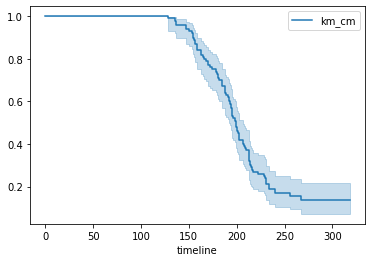

In [6]:
import lifelines
from matplotlib import pyplot as plt

max_event_censor_1 = train_df[train_df['max']<=250].groupby('id').last()  
max_event_censor_2 = train_df[(train_df['max']>250) & (train_df['cycle']>250)].groupby('id').sample(n=1,random_state=21)

max_event_censor_mix = pd.concat([max_event_censor_1,max_event_censor_2])
kmf_cm = lifelines.KaplanMeierFitter(label='km_cm')
kmf_cm.fit(durations=max_event_censor_mix['cycle'],
event_observed=max_event_censor_mix['observed'])
kmf_cm.plot_survival_function()
plt.show()

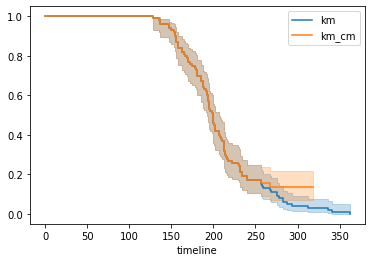

In [7]:
ax = kmf.plot_survival_function()
kmf_cm.plot_survival_function(ax=ax)
plt.show()


从下图我们可以看到，由于数据删失，我们无法很准确的得到250次以上的信息。

有可能无法得到最长的寿命，也有可能得到不准确的概率估计。

## 生存函数
我们注意到plot_survival_function 绘制的曲线，就是生存函数图。
图中的阴影部分表示置信区间，样本量越大，置信区间越窄。

生存函数就是寿命T大于t的概率：
S(t)=Pr(T>t)
t表示某个时间，T表示生存的时间（寿命），Pr表示表示概率。

比如人类寿命的生存函数大概就是这样：
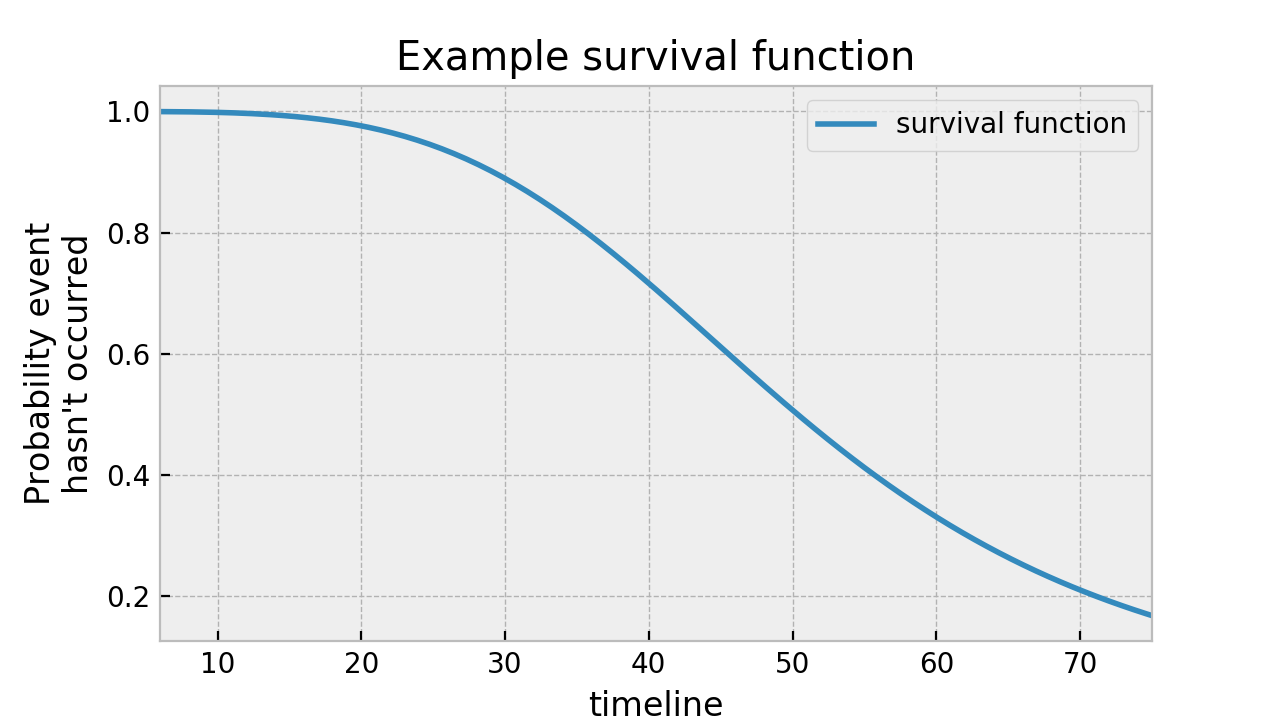

## 模型预测

建立好模型，对于输入的任何持续时间，我们都能估计出它的生存概率。
同样的，对比上述几个模型的结果，我们会看到基于删失数据的模型，准确率自然要差一些。

- 采用kmf_cm 进行预测

In [8]:
kmf_cm.predict([100,150,200,300,500])

100    1.000000
150    0.930000
200    0.460000
300    0.134505
500    0.134505
Name: km_cm, dtype: float64

- 采用kmf 进行预测

In [9]:
kmf.predict([100,150,200,300,500])

100    1.00
150    0.93
200    0.46
300    0.04
500    0.00
Name: km, dtype: float64

- 比如我们想要知道50%的观测对象能持续多久？ 

In [10]:
kmf_cm.median_survival_time_

199.0